In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns

In [2]:
ds= pd.read_csv('breastcancer.csv')
ds.head(7) #test to check if file is readable

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [3]:
#check how many empty values are there
ds.isna().sum() #it is not neccessary to do delete or fill in the NaN values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

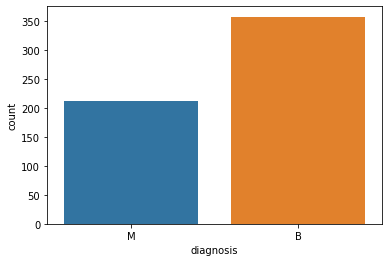

In [4]:
#visualize count
sns.countplot(x=ds['diagnosis'])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

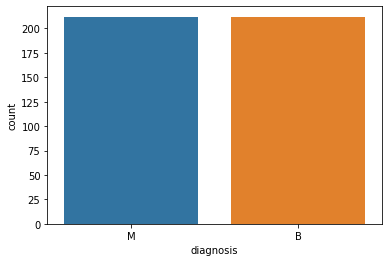

In [5]:
#Balance the classes
from sklearn.utils import resample
import random
class0 = ds[ds.diagnosis == 'M']
class1 = ds[ds.diagnosis == 'B']
n_class0 = len(class0)
class1_downsampled = resample(class1, replace=True, n_samples=n_class0, random_state=0)
ds = pd.concat([class0, class1_downsampled])

#visualize count
sns.countplot(x=ds['diagnosis'])
#There is another solution to this problem to add a class_weight = 'balanced' parameter to skLearn classification algorithms

In [6]:
#look at the data types to see which columns need to be encoded
ds.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
#encode categorical data values, in this case M as 1 and B as 0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
ds.iloc[:,1] = labelencoder_Y.fit_transform(ds.iloc[:,1].values)

c:\users\nkouj\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


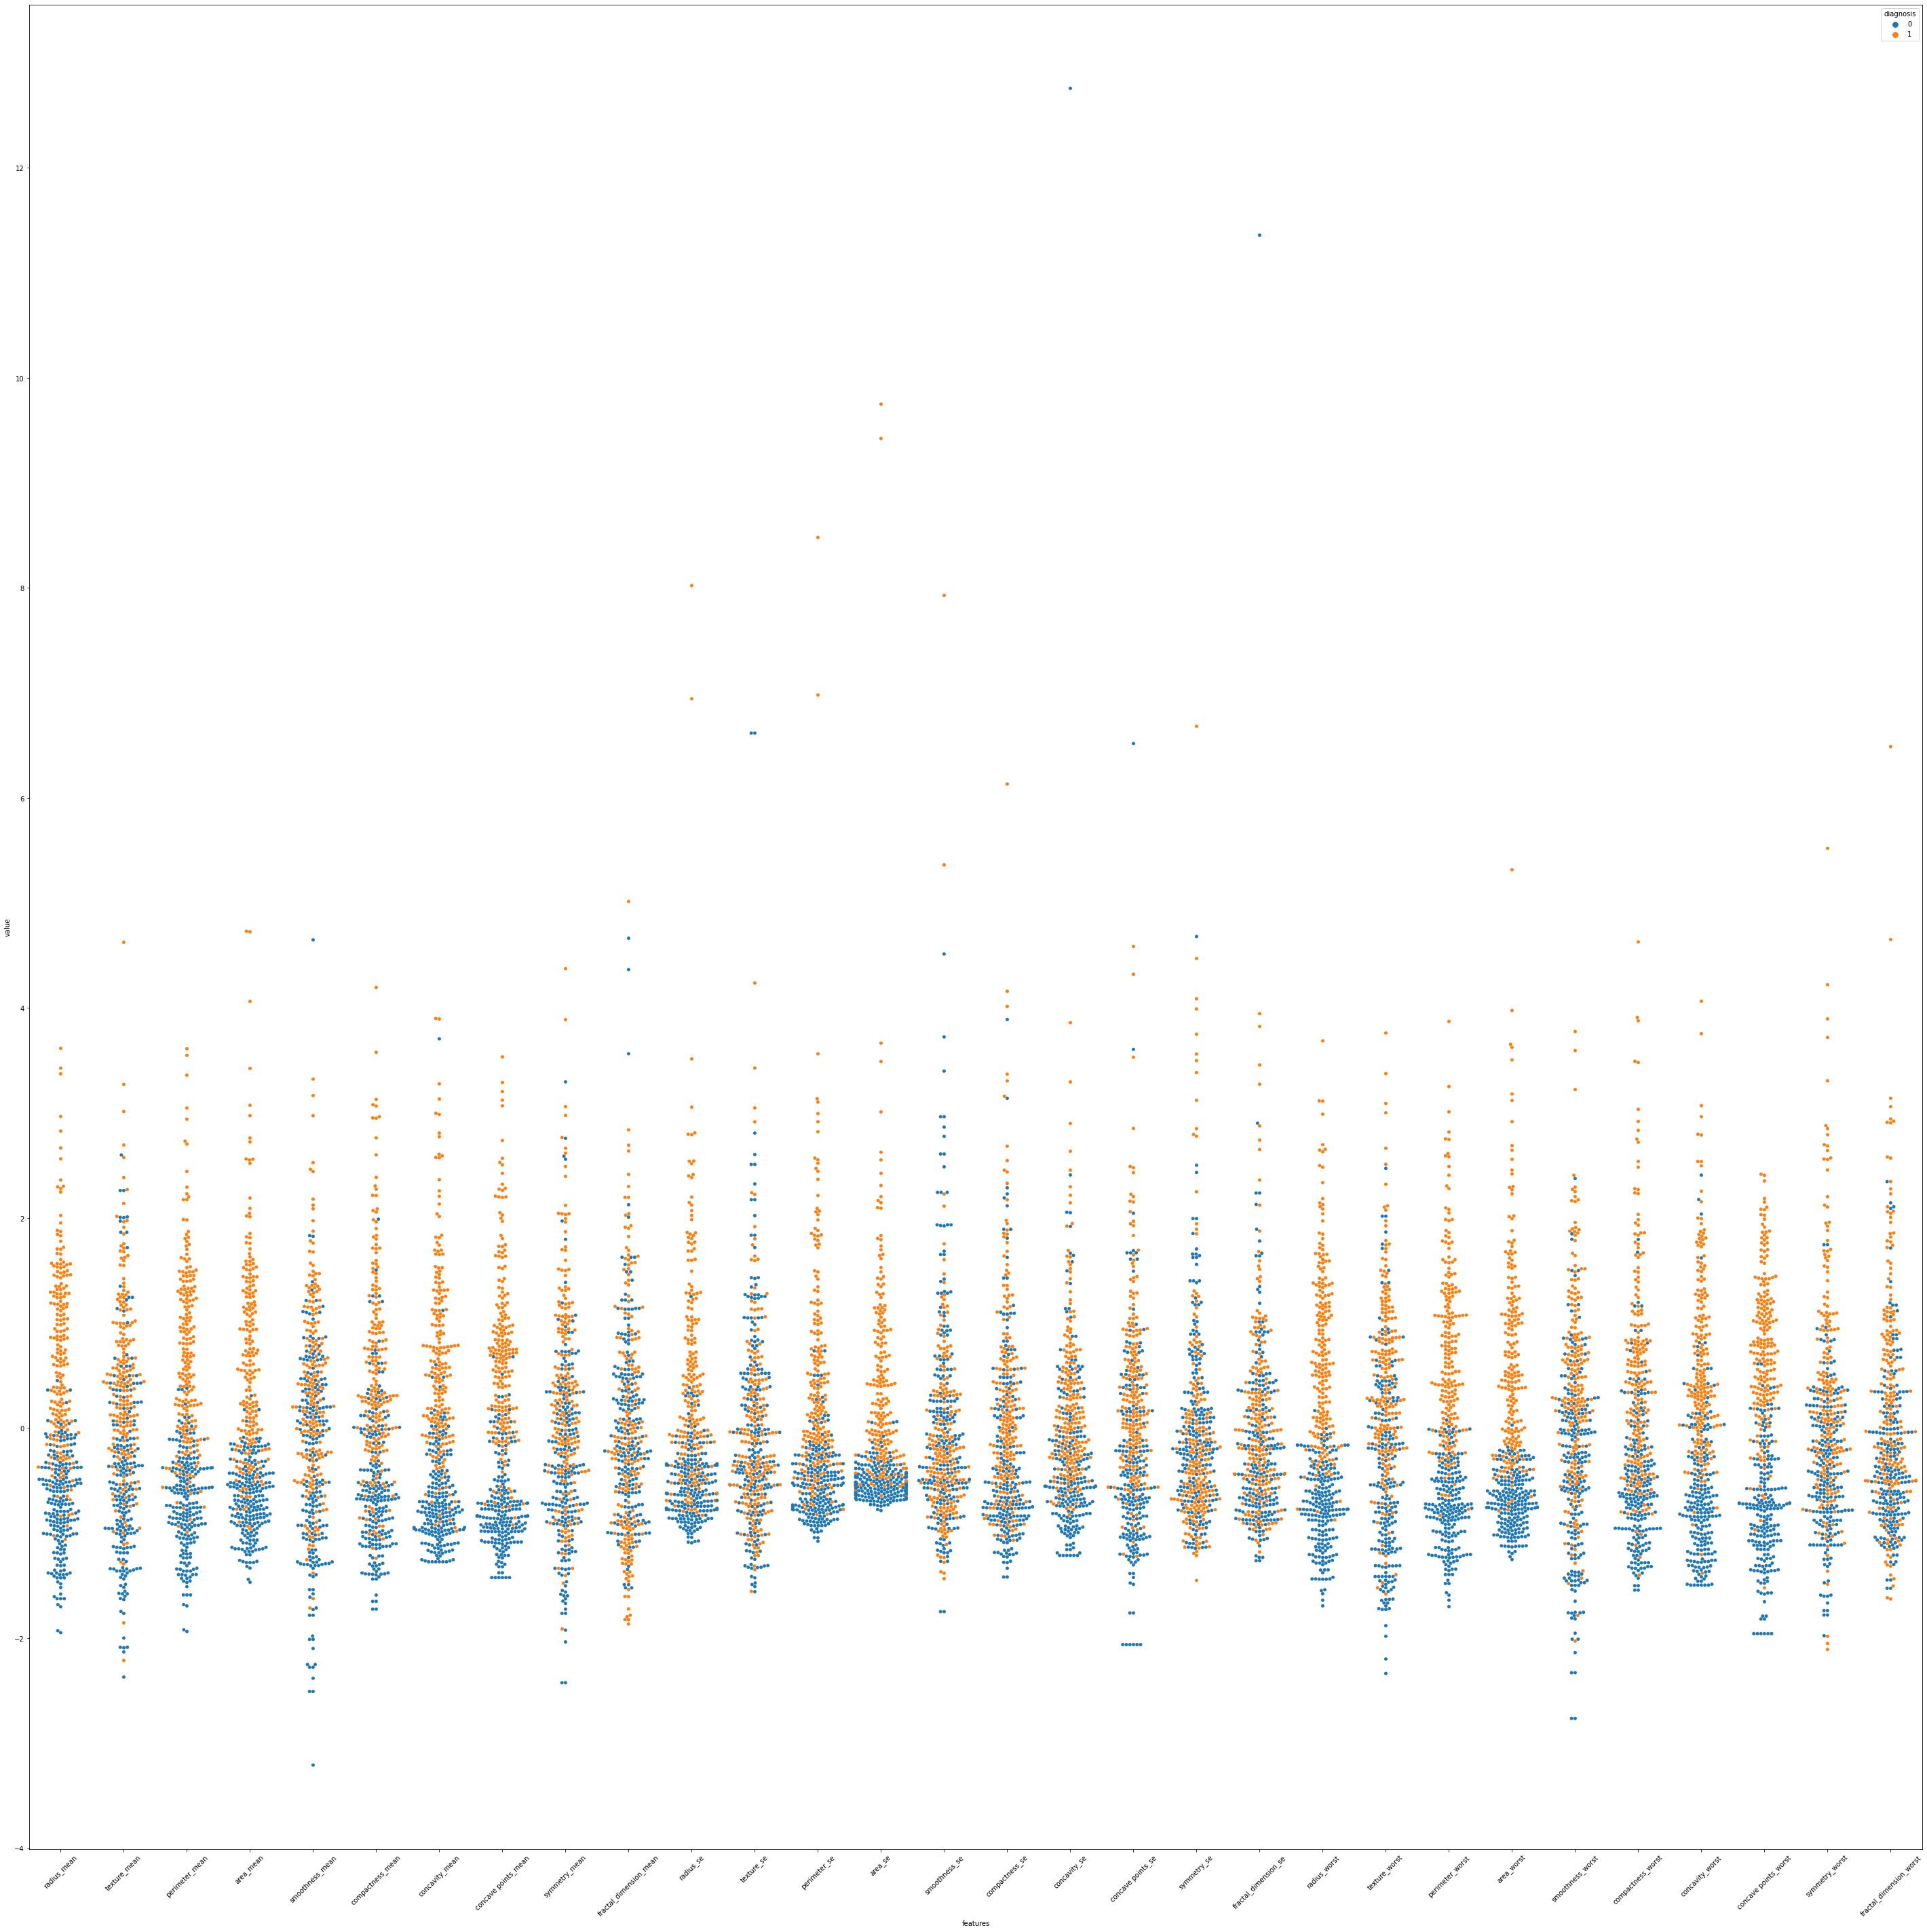

In [9]:
#Create a swarmplot to see diagnosis points on graph
data = ds.iloc[:,2:32]
data_std=(data-data.mean())/data.std()
data = pd.concat([ds.diagnosis, data_std], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
pyp.figure(figsize=(50,50))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
pyp.xticks(rotation=45)
pyp.show()

<AxesSubplot:>

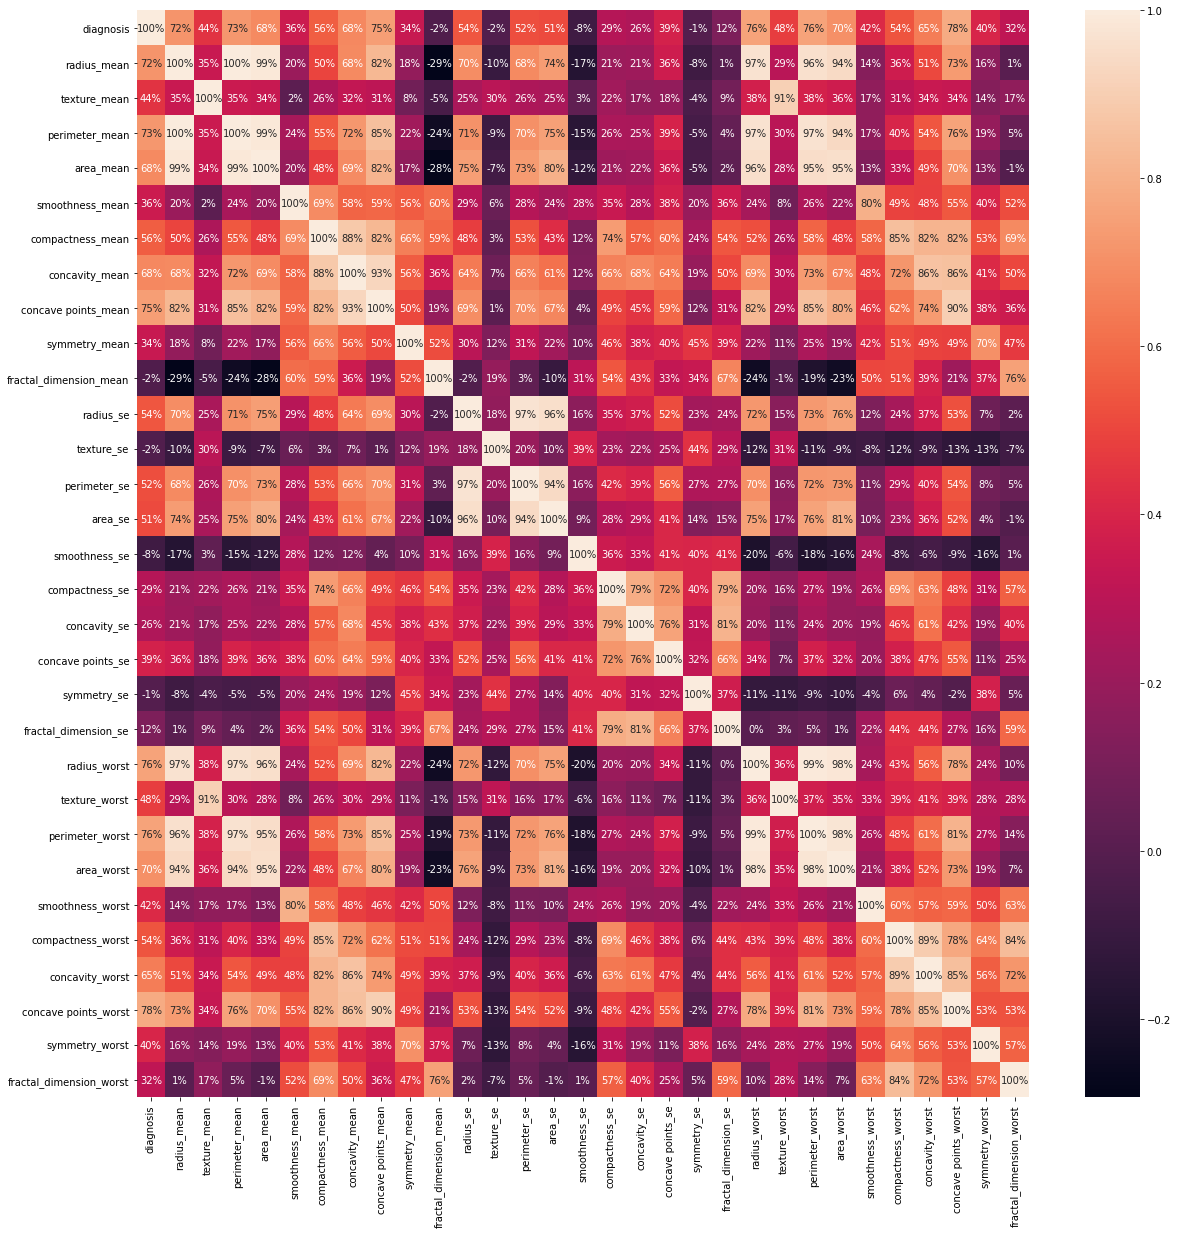

In [10]:
#visualize correlation
pyp.figure(figsize=(20,20))
sns.heatmap(ds.iloc[:,1:32].corr(), annot=True, fmt='.0%')

<AxesSubplot:>

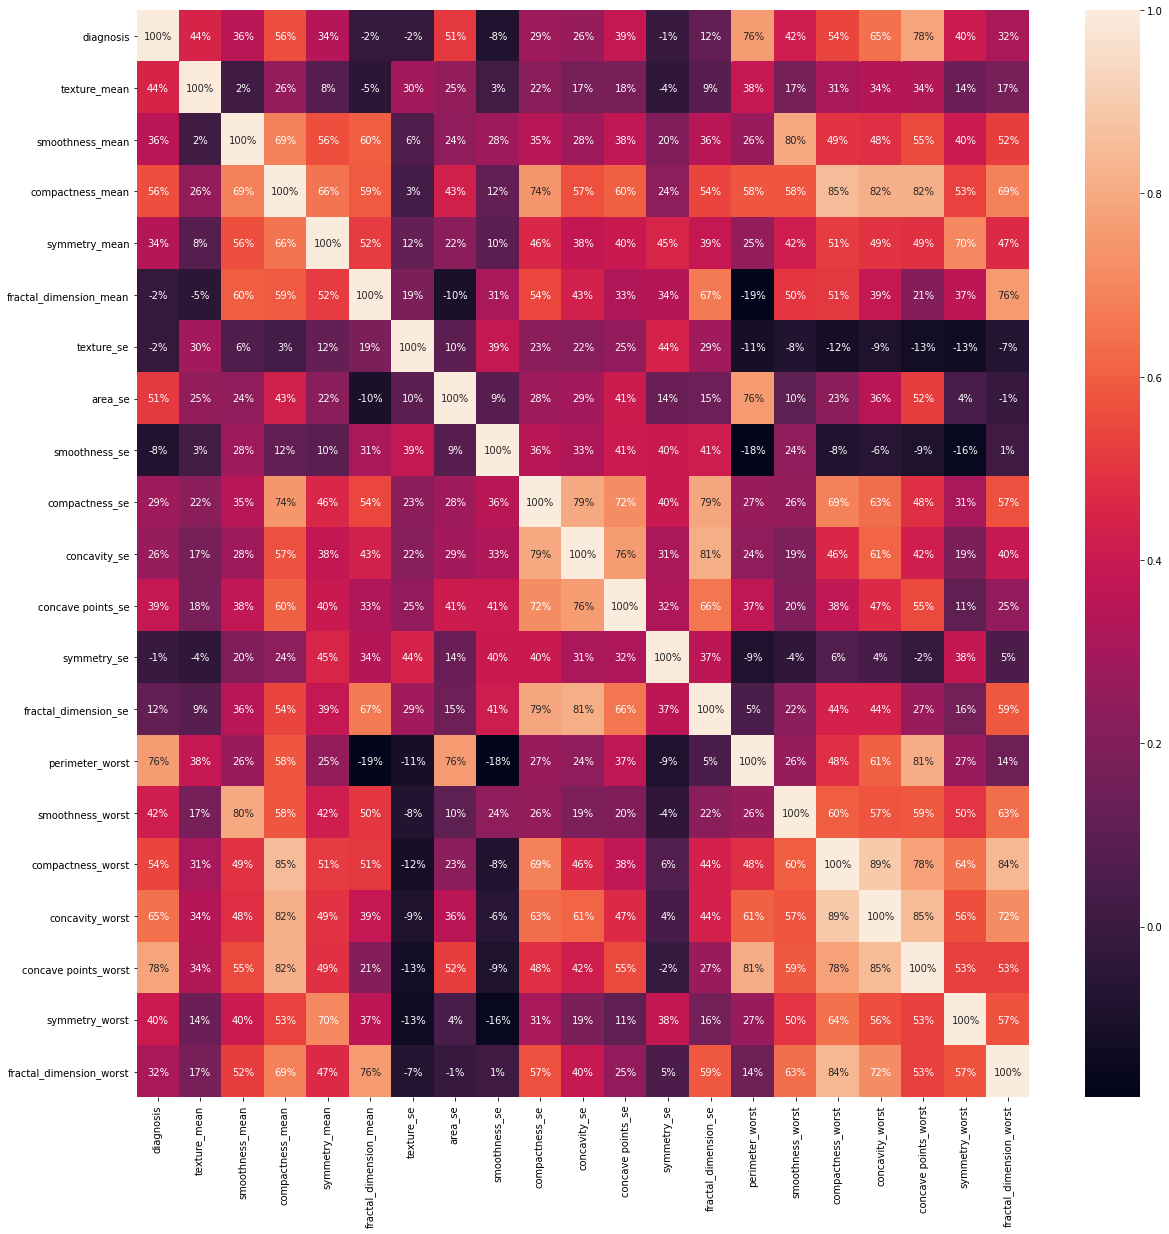

In [11]:
#Delete all redundant features
drop_list=['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'texture_worst',
          'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se']
ds = ds.drop(drop_list, axis=1)
pyp.figure(figsize=(20,20))
sns.heatmap(ds.iloc[:,1:22].corr(), annot=True, fmt='.0%')

In [12]:
#split dataset into independent (X) and dependant (Y)
X = ds.iloc[:,2:22].values 
Y = ds.iloc[:,1].values

In [13]:
#scale data to bring all features to the same magnitude(Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
#split data into training(70%) and test(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [15]:
# create a function for a few models to try to detect cancer
def models(X_train, Y_train):
    #Logistic Regression Model
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #Print accuracy of models on training data
    print('[0]Logistic Regression training accuracy: ', log.score(X_train, Y_train))
    print('[1]Decision tree training accuracy: ', tree.score(X_train, Y_train))
    print('[2]Random Forest training accuracy: ', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [16]:
#get all models
model = models(X_train, Y_train)

[0]Logistic Regression training accuracy:  0.9763513513513513
[1]Decision tree training accuracy:  1.0
[2]Random Forest training accuracy:  0.9966216216216216


In [17]:
#test model accuracy on test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print (accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.97      0.94      0.96        69

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128

0.953125

Model  1
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.98      0.94      0.96        69

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128

0.9609375

Model  2
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        59
           1       0.98      0.91      0.95        69

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95   

In [18]:
#improving accuracy with cross validation
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(len(model)):
    cv = cross_val_score(model[i], X, Y, cv=kf, scoring = 'accuracy', n_jobs = -1)
    print('Model ', i)
    print(cv.mean())
    print()

Model  0
0.9669988925802878

Model  1
0.9529900332225913

Model  2
0.969545957918051

